In [1]:
!pwd

/content


In [2]:
cd /content/drive/My\ Drive/서빅캠

/content/drive/My Drive/서빅캠


In [4]:
import pandas as pd
import numpy as np

In [50]:
gong = pd.read_csv('공영충전소.csv',encoding='cp949')
ap = pd.read_csv('아파트충전소.csv',encoding='cp949')

In [51]:
gong

,행정동코드,행정동,남생7,여생7,남생12,여생12,남생18,여생18,marmm,chamm,가중치
0,1111051500,청운효자동,0.087842,0.105365,0.073953,0.095362,0.081888,0.112505,0.011641,0.098303,2.098883
1,1111053000,사직동,0.196707,0.231637,0.205510,0.246475,0.181448,0.213013,0.134150,0.005915,4.250480
2,1111054000,삼청동,0.016942,0.000503,0.029392,0.027569,0.010410,0.004297,0.034195,0.016618,0.436396
3,1111055000,부암동,0.057359,0.090197,0.043841,0.065207,0.066146,0.099946,0.004365,0.096722,1.668071
4,1111056000,평창동,0.087788,0.139152,0.062167,0.090696,0.090465,0.140394,0.004757,0.068189,2.119013
...,...,...,...,...,...,...,...,...,...,...,...
419,1174065000,성내제2동,0.137550,0.205874,0.102355,0.146162,0.174675,0.238937,0.057085,0.017393,3.257490
420,1174066000,성내제3동,0.153122,0.210870,0.115990,0.146395,0.179368,0.224375,0.090441,0.025401,3.463287
421,1174068500,길동,0.289388,0.450044,0.207621,0.302142,0.353299,0.484582,0.099116,0.023430,6.652296
422,1174069000,둔촌제1동,0.024023,0.013638,0.015565,0.010148,0.013393,0.014014,0.000000,0.038436,0.426088


In [52]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [53]:
gong.iloc[:,2:-1]

,남생7,여생7,남생12,여생12,남생18,여생18,marmm,chamm
0,0.087842,0.105365,0.073953,0.095362,0.081888,0.112505,0.011641,0.098303
1,0.196707,0.231637,0.205510,0.246475,0.181448,0.213013,0.134150,0.005915
2,0.016942,0.000503,0.029392,0.027569,0.010410,0.004297,0.034195,0.016618
3,0.057359,0.090197,0.043841,0.065207,0.066146,0.099946,0.004365,0.096722
4,0.087788,0.139152,0.062167,0.090696,0.090465,0.140394,0.004757,0.068189
...,...,...,...,...,...,...,...,...
419,0.137550,0.205874,0.102355,0.146162,0.174675,0.238937,0.057085,0.017393
420,0.153122,0.210870,0.115990,0.146395,0.179368,0.224375,0.090441,0.025401
421,0.289388,0.450044,0.207621,0.302142,0.353299,0.484582,0.099116,0.023430
422,0.024023,0.013638,0.015565,0.010148,0.013393,0.014014,0.000000,0.038436


In [54]:
cluster = linkage(gong.iloc[:,2:-1],method='average')

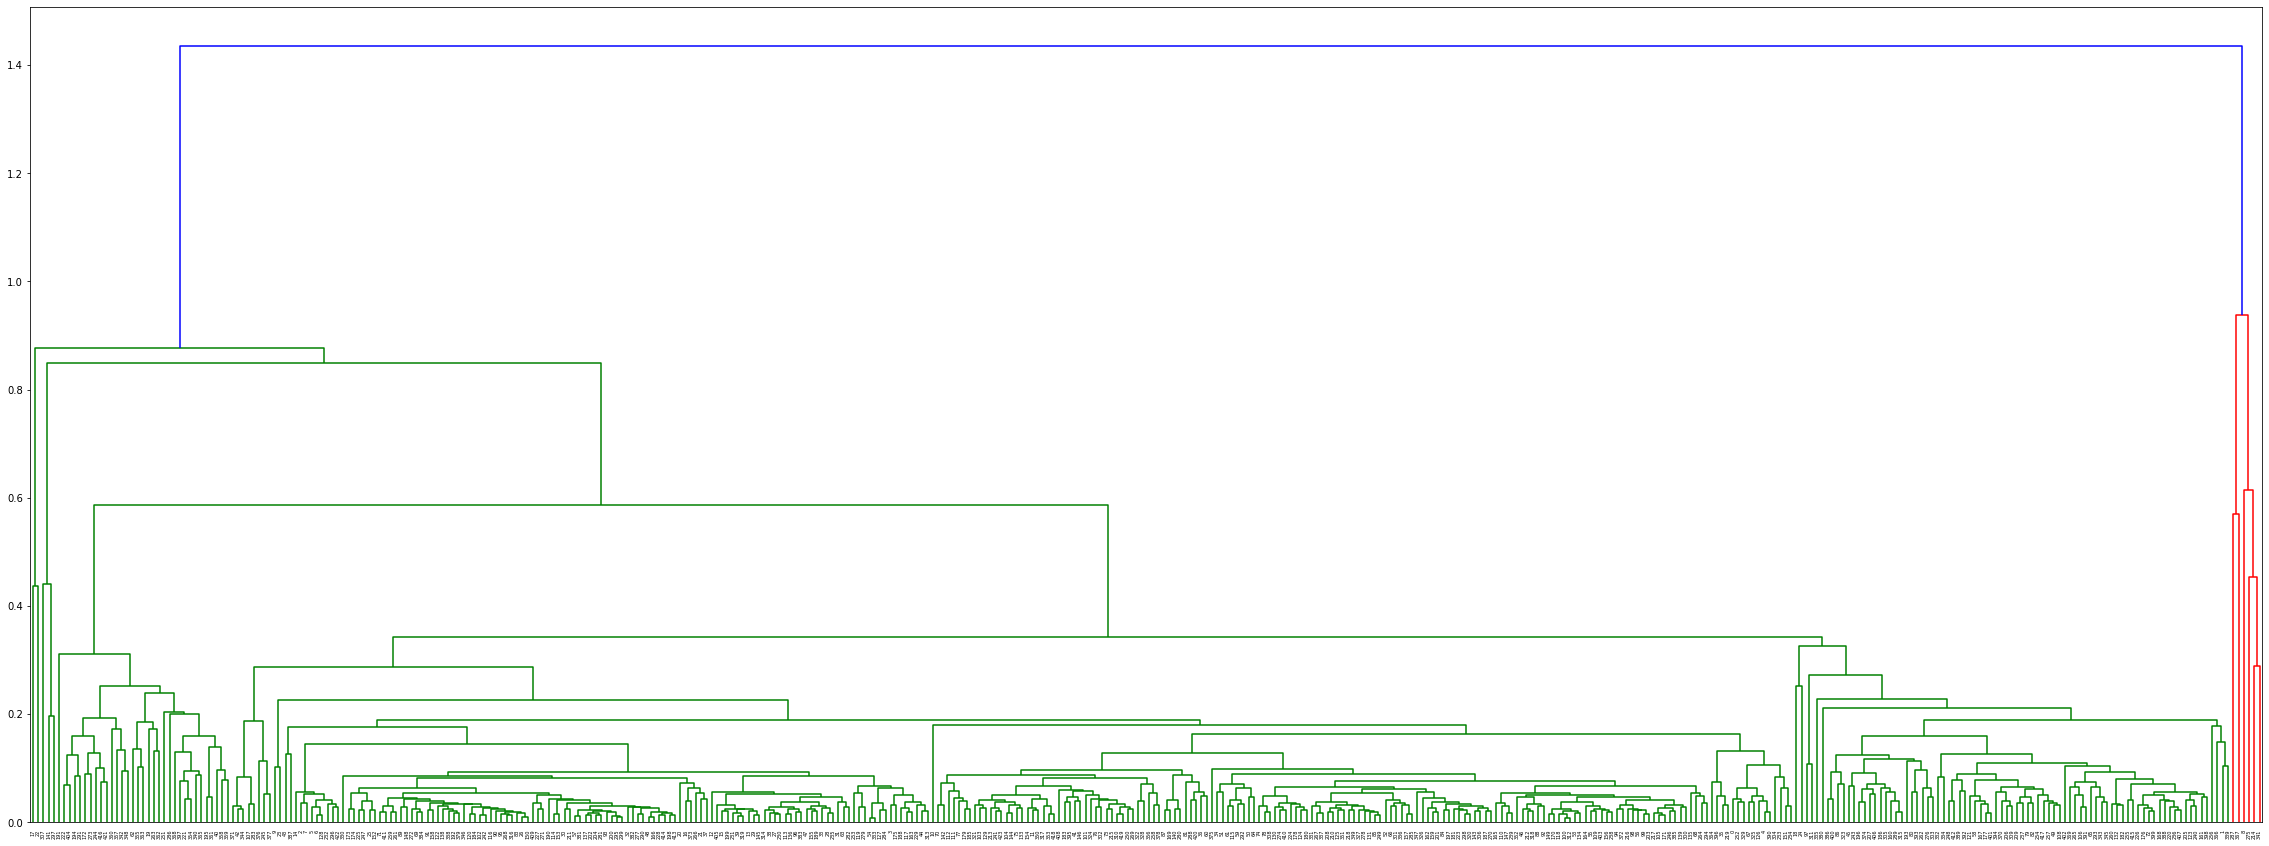

In [55]:
plt.figure(figsize=(40,15))
dent = shc.dendrogram(cluster)

In [56]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage='average') 
pred = cluster.fit_predict(gong.iloc[:,2:-1])

In [57]:
gong['cluster'] = pred

In [58]:
gong.shape

(424, 12)

In [59]:
gong0 = gong[gong['cluster'] == 0].reset_index(drop=True)
gong1 = gong[gong['cluster'] == 1].reset_index(drop=True)
gong2 = gong[gong['cluster'] == 2].reset_index(drop=True)
gong3 = gong[gong['cluster'] == 3].reset_index(drop=True)
gong4 = gong[gong['cluster'] == 4].reset_index(drop=True)

In [60]:
gong0.shape

(4, 12)

In [61]:
gong1.shape

(413, 12)

In [62]:
gong2.shape

(2, 12)

In [63]:
gong3.shape

(2, 12)

In [64]:
gong4.shape

(3, 12)

In [65]:
gong1.sort_values(by='가중치',ascending=False)

,행정동코드,행정동,남생7,여생7,남생12,여생12,남생18,여생18,marmm,chamm,가중치,cluster
280,1156053500,영등포동,0.411368,0.473386,0.355883,0.429626,0.479746,0.547640,0.180994,0.025238,8.736883,1
37,1117062500,한강로동,0.392274,0.422257,0.382534,0.406552,0.420236,0.471206,0.201813,0.003306,8.103840,1
357,1168065000,역삼2동,0.389024,0.504514,0.350508,0.425601,0.388252,0.458900,0.103817,0.039589,8.020205,1
246,1150060300,가양제1동,0.450493,0.458716,0.392867,0.371503,0.432918,0.481475,0.005429,0.000000,7.780201,1
349,1168053100,논현2동,0.347836,0.396427,0.379831,0.416152,0.386758,0.413004,0.199966,0.019253,7.696938,1
...,...,...,...,...,...,...,...,...,...,...,...,...
125,1129078000,장위제3동,0.018087,0.024965,0.014404,0.019558,0.025003,0.030678,0.002071,0.007659,0.434933,1
411,1174069000,둔촌제1동,0.024023,0.013638,0.015565,0.010148,0.013393,0.014014,0.000000,0.038436,0.426088,1
227,1147061000,신월6동,0.003076,0.004736,0.009240,0.013306,0.014926,0.018950,0.018189,0.038857,0.402700,1
5,1111057000,무악동,0.009373,0.021044,0.004940,0.012031,0.009240,0.017062,0.000000,0.009182,0.257800,1


In [66]:
gong0

,행정동코드,행정동,남생7,여생7,남생12,여생12,남생18,여생18,marmm,chamm,가중치,cluster
0,1111061500,종로1.2.3.4가동,0.577214,0.469573,0.676349,0.626175,0.573271,0.479855,0.834677,0.004186,12.728086,0
1,1144066000,서교동,0.396109,0.532363,0.427641,0.564097,0.600941,0.762974,0.380121,0.022725,11.083644,0
2,1154551000,가산동,0.734857,0.581692,0.752327,0.584098,0.652641,0.469653,0.268581,0.001801,12.138752,0
3,1165053000,서초3동,0.544966,0.620825,0.546607,0.572067,0.549999,0.603682,0.281789,0.063077,11.412109,0


In [67]:
gong2

,행정동코드,행정동,남생7,여생7,남생12,여생12,남생18,여생18,marmm,chamm,가중치,cluster
0,1156054000,여의동,1.000000,0.861463,0.972604,0.833404,0.736346,0.710607,0.200022,0.015592,16.005709,2
1,1168064000,역삼1동,0.948464,1.000000,1.000000,1.000000,1.000000,1.000000,0.547067,0.036752,19.633603,2


In [68]:
gong3

,행정동코드,행정동,남생7,여생7,남생12,여생12,남생18,여생18,marmm,chamm,가중치,cluster
0,1114052000,소공동,0.301708,0.283206,0.334181,0.352760,0.198636,0.174587,0.653235,0.006316,6.920200,3
1,1114059000,광희동,0.176640,0.173036,0.191715,0.202617,0.182782,0.183342,1.000000,0.003209,6.343231,3


In [69]:
gong4

,행정동코드,행정동,남생7,여생7,남생12,여생12,남생18,여생18,marmm,chamm,가중치,cluster
0,1130564500,우이동,0.083620,0.118873,0.066943,0.089732,0.091916,0.122889,0.006884,0.930963,5.466425,4
1,1156067000,신길제5동,0.014311,0.024445,0.013456,0.021017,0.026026,0.033024,0.007443,1.000000,4.419162,4
2,1159055000,상도제3동,0.081383,0.136578,0.051574,0.080318,0.098276,0.151012,0.039456,0.548361,4.109236,4


In [86]:
charger = pd.read_table('api_charger_jjinfinal.txt',sep=',')

In [87]:
charger1 = charger[['행정동코드','행정동','cnt']]

In [89]:
charger2 = charger1.groupby(by=['행정동코드','행정동']).sum()

In [91]:
charger2.reset_index(drop=False,inplace=True)

In [94]:
charger2.head()

,행정동코드,행정동,cnt
0,1111051500,청운효자동,2
1,1111053000,사직동,58
2,1111054000,삼청동,2
3,1111055000,부암동,2
4,1111056000,평창동,7


In [97]:
market =pd.read_csv('점포수mm.csv',encoding='cp949')
res = pd.read_csv('거주인구mm.csv',encoding='cp949')
cha = pd.read_csv('충천소당차량.csv',encoding='cp949')
live = pd.read_csv('10_20_생활인구.txt',sep=',')

In [104]:
market1 = pd.merge(charger2,market,on='행정동코드',how='left')

In [106]:
market1 = market1.fillna(0).drop(['mm'],axis=1)

In [111]:
market1['충당점포'] = market1['유사_업종_점포_수']/market1['cnt']

In [116]:
cha.drop(['mm'],axis=1,inplace=True)

In [118]:
live.rename(columns={'남자25세부터64세생활인구수':'남1020','여자25세부터64세생활인구수':'여1020'},inplace=True)

In [120]:
live.drop(['시간대구분'],axis=1,inplace=True)

In [125]:
live['행정동코드'] = live['행정동코드']*100

In [126]:
live1 = pd.merge(live,charger2,on='행정동코드',how='left')

In [128]:
live1.drop(['행정동_y'],axis=1,inplace=True)

In [131]:
live1

,행정동코드,남1020,여1020,행정동_x,cnt
0,1111051500,4995.421106,5370.162082,청운효자동,2.0
1,1111053000,11489.485497,11264.085030,사직동,58.0
2,1111054000,2313.101297,2097.447203,삼청동,2.0
3,1111055000,3635.535240,4352.644285,부암동,2.0
4,1111056000,4659.548813,5611.771518,평창동,7.0
...,...,...,...,...,...
419,1174065000,7366.694836,8416.536930,성내제2동,17.0
420,1174066000,7969.399770,8287.195056,성내제3동,12.0
421,1174068500,13895.929605,16034.304453,길동,27.0
422,1174069000,1812.854183,1696.314741,둔촌제1동,5.0


In [132]:
live1.rename(columns={'행정동_x':'행정동'},inplace=True)

In [134]:
live1['충당남1020'] = live1['남1020']/live1['cnt']
live1['충당여1020'] = live1['여1020']/live1['cnt']

In [141]:
res.drop(['STD_YM','mm'],axis=1,inplace=True)

In [145]:
res1 = pd.merge(res,charger2,on='행정동코드',how='left')

In [147]:
res1.drop(['행정동_y'],axis=1,inplace=True)

In [149]:
res1.rename(columns={'행정동_x':'행정동'},inplace=True)

In [151]:
res1['충당거주인구'] = res1['거주인구']/res1['cnt']

In [152]:
res1.head()

,행정동코드,행정동,거주인구,cnt,충당거주인구
0,1111051500,청운효자동,12035,2.0,6017.500000
1,1111053000,사직동,9376,58.0,161.655172
2,1111054000,삼청동,2484,2.0,1242.000000
3,1111055000,부암동,9679,2.0,4839.500000
4,1111056000,평창동,18177,7.0,2596.714286


In [175]:
ap = pd.merge(res1,cha,on='행정동코드',how='left')

In [176]:
ap.drop(['거주인구','cnt_x','cnt_y','행정동_y','전하'],axis=1,inplace=True)

In [177]:
ap.rename(columns={'행정동_x':'행정동'},inplace=True)

In [179]:
ap.shape

(423, 4)

In [180]:
ap1 = ap.dropna()

In [181]:
ap1.shape

(402, 4)

In [182]:
ap1.iloc[:,2:]

,충당거주인구,담당
0,6017.500000,95.000000
1,161.655172,7.344828
2,1242.000000,17.500000
3,4839.500000,93.500000
4,2596.714286,66.428571
...,...,...
418,1407.647059,18.235294
419,1945.250000,25.833333
420,1702.296296,23.962963
421,26.800000,38.200000


In [183]:
cluster = linkage(ap1.iloc[:,2:],method='average')

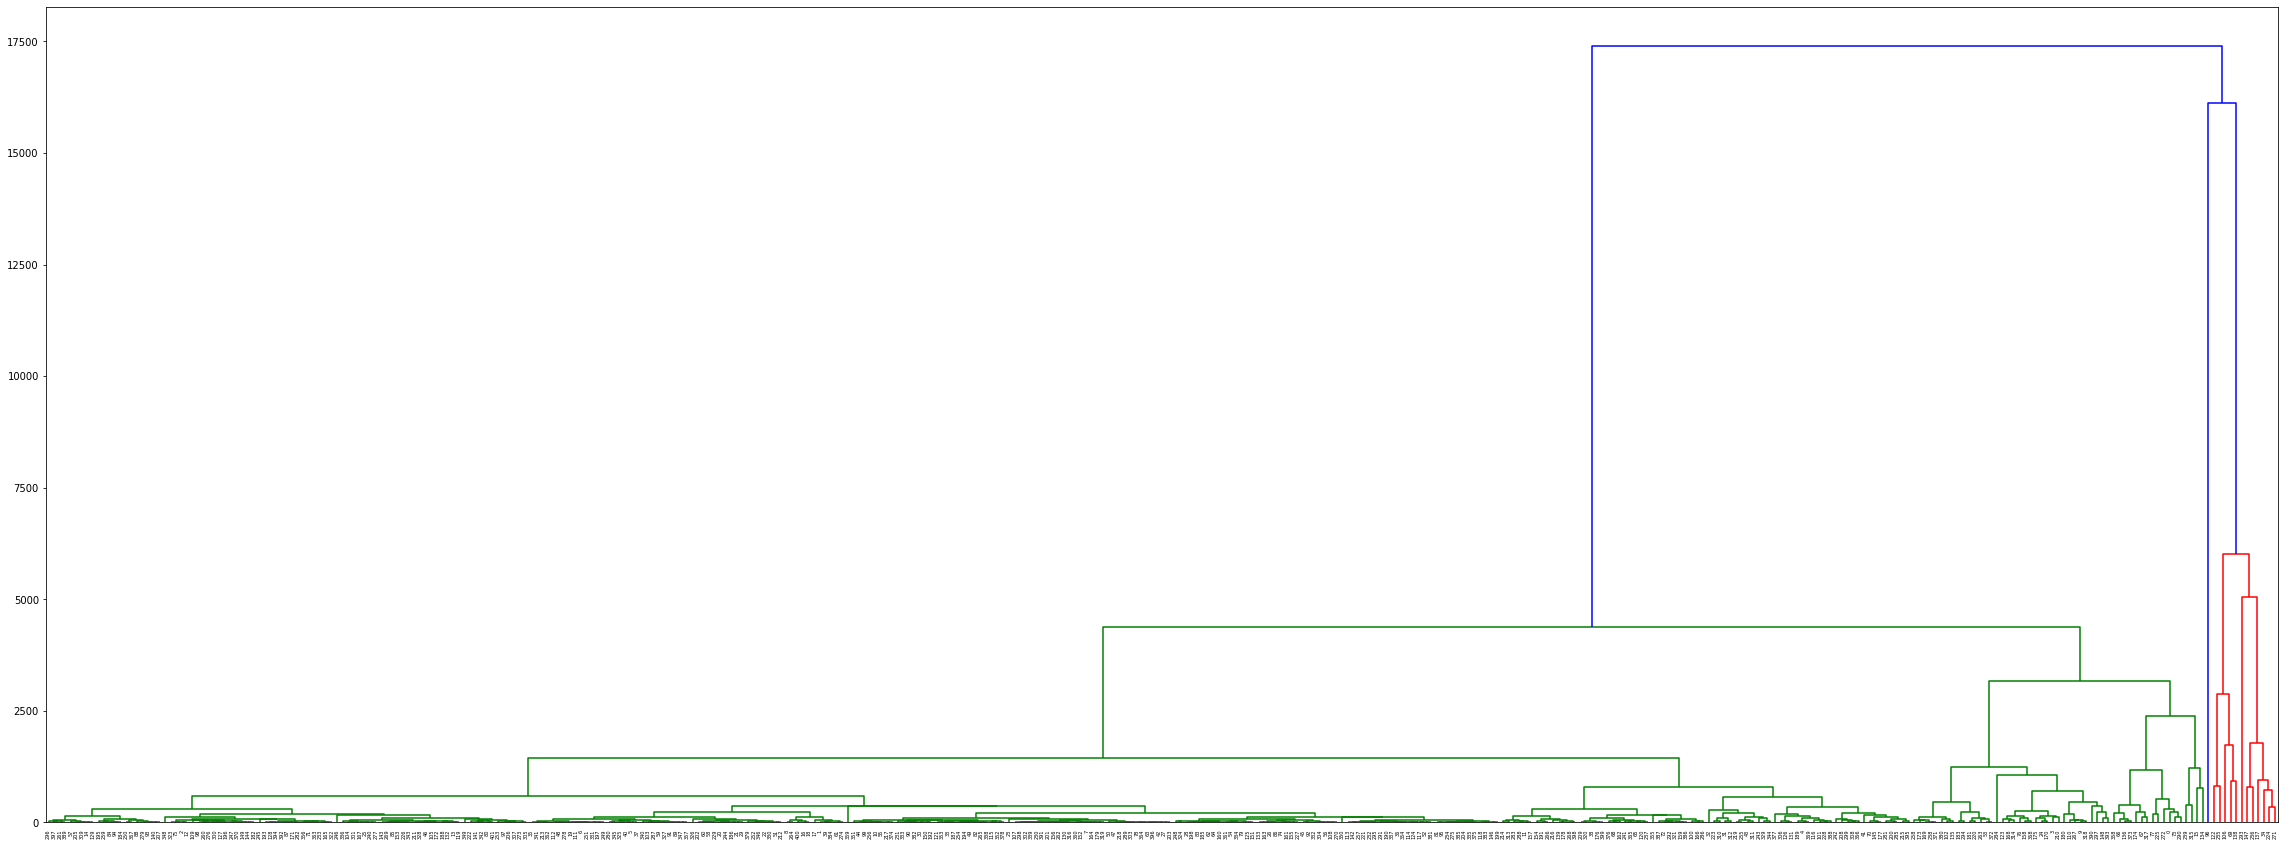

In [184]:
plt.figure(figsize=(40,15))
dent = shc.dendrogram(cluster)

In [185]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, linkage='average') 
pred = cluster.fit_predict(ap1.iloc[:,2:])

In [186]:
ap1['cluster'] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
ap10 = ap1[ap1['cluster'] == 0].reset_index(drop=True)
ap11 = ap1[ap1['cluster'] == 1].reset_index(drop=True)
ap12 = ap1[ap1['cluster'] == 2].reset_index(drop=True)
ap13 = ap1[ap1['cluster'] == 3].reset_index(drop=True)
ap14 = ap1[ap1['cluster'] == 4].reset_index(drop=True)
ap15 = ap1[ap1['cluster'] == 5].reset_index(drop=True)

In [193]:
ap13

,행정동코드,행정동,충당거주인구,담당,cluster
0,1117055500,청파동,19568.0,153.0,3
1,1130564500,우이동,20631.0,885.0,3
2,1132067000,쌍문2동,18841.0,160.0,3
3,1147061100,신월7동,20122.0,193.0,3
4,1150055000,화곡2동,18074.0,348.0,3
5,1154570000,시흥4동,20456.0,231.0,3


In [194]:
ap14

,행정동코드,행정동,충당거주인구,담당,cluster
0,1159055000,상도3동,24643.0,522.0,4


In [195]:
ap15

,행정동코드,행정동,충당거주인구,담당,cluster
0,1126056500,면목본동,33943.0,194.0,5


In [240]:
apneed = pd.concat([ap13,ap14,ap15])

In [242]:
apneed.reset_index(drop=True,inplace=True)

In [243]:
ap1.to_csv('아파트충전소.csv',index=False,encoding='cp949')
apneed.to_csv('아파트필요.csv',index=False,encoding='cp949')

In [207]:
a = pd.merge(live1,cha,on='행정동코드',how='left')

In [208]:
a.drop(['cnt_x','행정동_y','전하','cnt_y','남1020','여1020'],axis=1,inplace=True)

In [211]:
a.rename(columns={'행정동_x':'행정동'},inplace=True)

In [213]:
b = pd.merge(a,market1,on='행정동코드',how='left')

In [215]:
b.drop(['행정동_y','cnt','유사_업종_점포_수'],axis=1,inplace=True)

In [217]:
gong = b.rename(columns={'행정동_x':'행정동'})

In [220]:
gong1 = gong.dropna()

In [221]:
gong1.shape

(396, 6)

In [224]:
gong1.head()

,행정동코드,행정동,충당남1020,충당여1020,담당,충당점포
0,1111051500,청운효자동,2497.710553,2685.081041,95.000000,105.000000
1,1111053000,사직동,198.094578,194.208363,7.344828,41.362069
2,1111054000,삼청동,1156.550649,1048.723601,17.500000,306.500000
3,1111055000,부암동,1817.767620,2176.322142,93.500000,40.000000
4,1111056000,평창동,665.649830,801.681645,66.428571,12.428571


In [246]:
gong2 = gong1.drop(['담당'],axis=1)

In [247]:
cluster = linkage(gong2.iloc[:,2:],method='average')

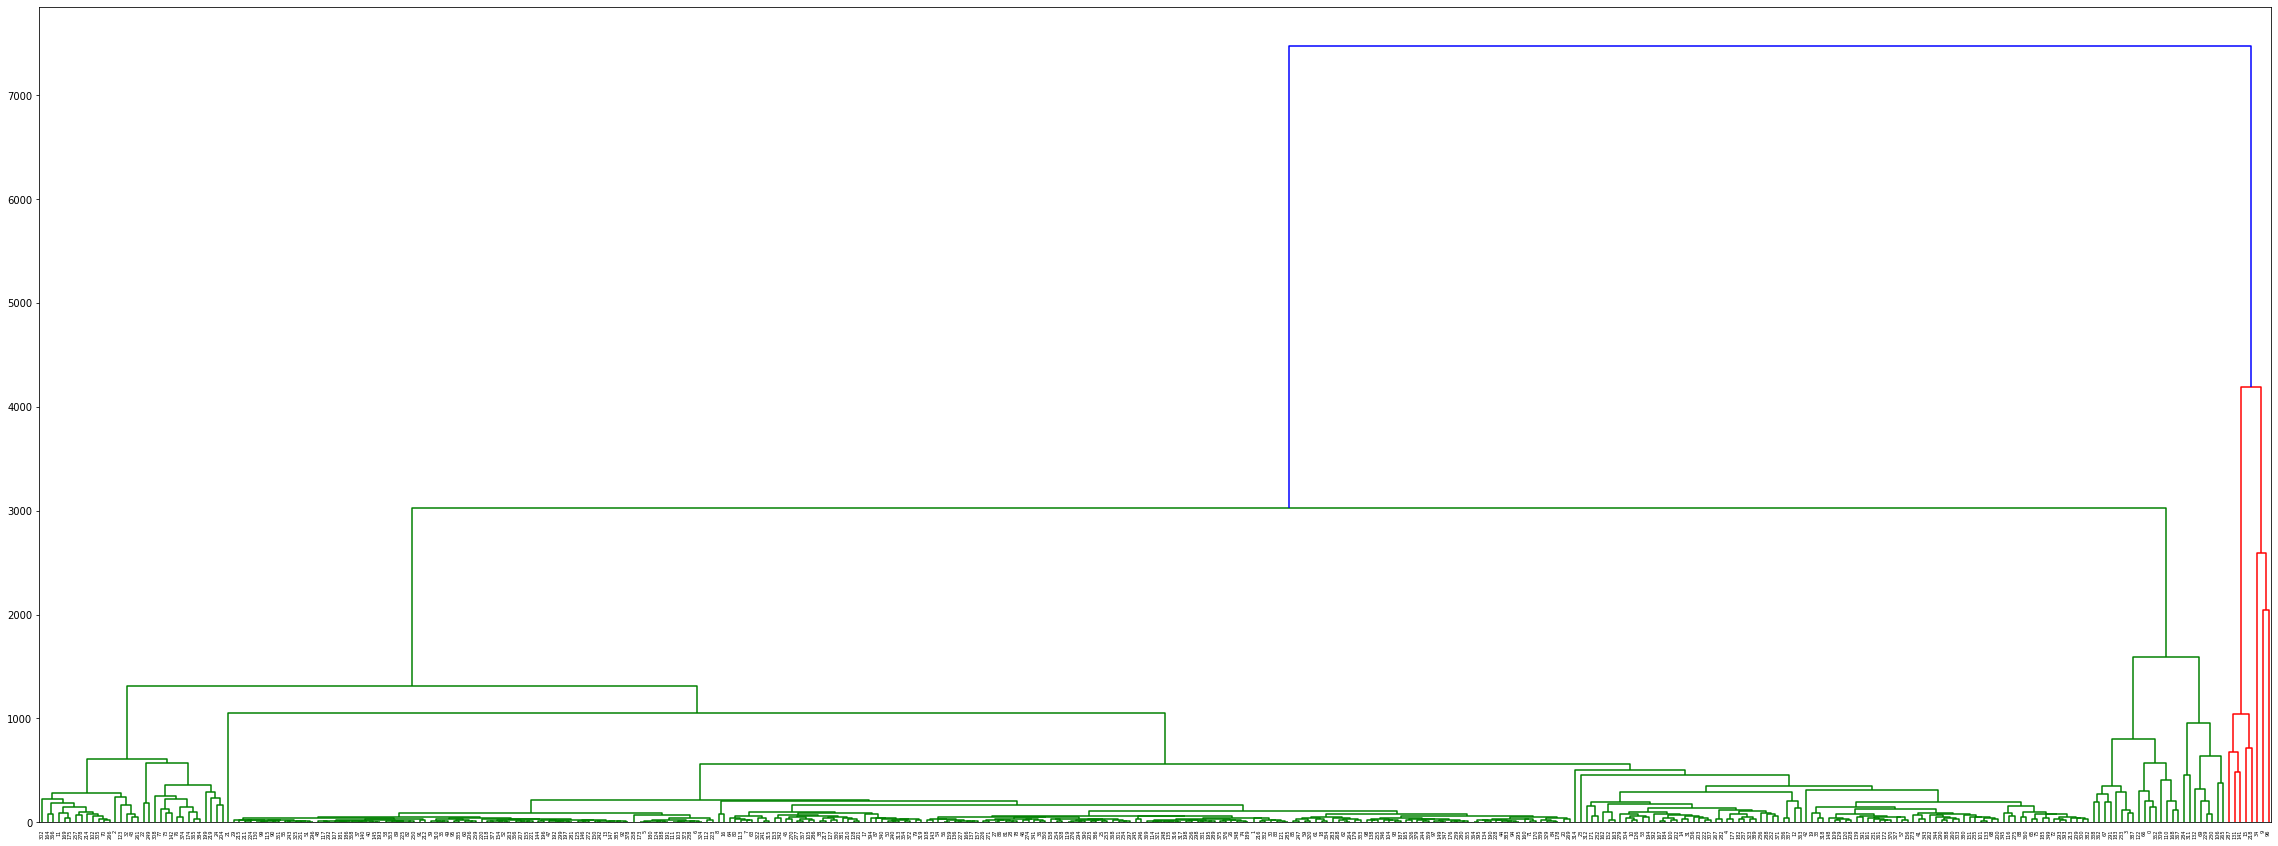

In [248]:
plt.figure(figsize=(40,15))
dent = shc.dendrogram(cluster)

In [249]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, linkage='average') 
pred = cluster.fit_predict(gong2.iloc[:,2:])

In [250]:
gong2['cluster'] = pred

In [251]:
gong2

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1111051500,청운효자동,2497.710553,2685.081041,105.000000,0
1,1111053000,사직동,198.094578,194.208363,41.362069,1
2,1111054000,삼청동,1156.550649,1048.723601,306.500000,1
3,1111055000,부암동,1817.767620,2176.322142,40.000000,0
4,1111056000,평창동,665.649830,801.681645,12.428571,1
...,...,...,...,...,...,...
419,1174065000,성내제2동,433.334990,495.090408,60.117647,1
420,1174066000,성내제3동,664.116647,690.599588,134.833333,1
421,1174068500,길동,514.664059,593.863128,65.666667,1
422,1174069000,둔촌제1동,362.570837,339.262948,0.000000,1


In [252]:
gong20 = gong2[gong2['cluster'] == 0].reset_index(drop=True)
gong21 = gong2[gong2['cluster'] == 1].reset_index(drop=True)
gong22 = gong2[gong2['cluster'] == 2].reset_index(drop=True)
gong23 = gong2[gong2['cluster'] == 3].reset_index(drop=True)
gong24 = gong2[gong2['cluster'] == 4].reset_index(drop=True)
gong25 = gong2[gong2['cluster'] == 5].reset_index(drop=True)

In [255]:
gong22

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1111071000,숭인제2동,4670.319153,4583.018872,856.0,2
1,1130564500,우이동,4818.844689,5302.801212,125.0,2
2,1132067000,쌍문제2동,4338.841899,5344.520763,108.0,2
3,1147061100,신월7동,4129.907374,4417.040151,420.0,2
4,1159055000,상도제3동,4363.663548,5398.006050,707.0,2


In [256]:
gong23

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1126056500,면목본동,7613.541867,8572.691508,1281.0,3


In [257]:
gong24

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1117055500,청파동,6237.065698,6832.68923,765.0,4


In [258]:
gong25

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1111063000,종로5.6가동,8733.358796,7150.862082,2236.0,5


In [259]:
gongneed = pd.concat([gong22,gong23,gong24,gong25])

In [260]:
gongneed.reset_index(drop=True,inplace=True)

In [261]:
gong2.to_csv('공영충전소.csv',index=False,encoding='cp949')
gongneed.to_csv('공영필요.csv',index=False,encoding='cp949')